In [ ]:
# Mengkloning repositori ultralytics
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 61361, done.
remote: Counting objects: 100% (510/510), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 61361 (delta 426), reused 337 (delta 317), pack-reused 60851 (from 2)
Receiving objects: 100% (61361/61361), 33.08 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (45650/45650), done.
/content/ultralytics


In [ ]:
# Menampilkan daftar file di direktori saat ini
!ls

CITATION.cff	 docker  examples  mkdocs.yml	   README.md	    tests
CONTRIBUTING.md  docs	 LICENSE   pyproject.toml  README.zh-CN.md  ultralytics


In [ ]:
# Menginstal ultralytics dalam mode editable
!pip install -e .

# Menginstal roboflow
!pip install roboflow

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Mengimpor ultralytics dan mencetak versinya
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.151


In [ ]:
# Mengimpor library yang dibutuhkan
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Mengunduh dataset dari Roboflow
from roboflow import Roboflow

In [ ]:
project_name="construction-site-safety"
project_version=29
rf = Roboflow(api_key="s2dBo6isT9cYdlM1NpH4") # Ganti dengan API key Anda jika perlu
project = rf.workspace("roboflow-universe-projects").project(project_name)
version = project.version(project_version)
dataset = version.download("yolov11") # Model format di Roboflow harus 'yolov8' atau yang kompatibel dengan Ultralytics YOLOv8+
# Jika Anda menggunakan format yolov5, mungkin perlu penyesuaian atau menggunakan yolov5 branch dari ultralytics

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Site-Safety-29 in yolov11:: 100%|██████████| 3530/3530 [00:00<00:00, 5870.49it/s]


In [ ]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mengekstrak file ZIP dataset dari Google Drive (jika diperlukan, biasanya Roboflow sudah mengekstrak)
import zipfile
import os

# Baris ini mungkin tidak diperlukan jika dataset.location sudah benar setelah diunduh Roboflow
# zip_file_path = "/content/drive/MyDrive/GiziSnap.v2i.zip" # Contoh path jika Anda mengunggah manual
# extracted_path = "/content/drive/MyDrive/GiziSnap-2" # Contoh path tujuan ekstraksi

# print(f"Lokasi dataset dari Roboflow: {dataset.location}")
# print(f"Path data.yaml: {os.path.join(dataset.location, 'data.yaml')}")

# Jika Anda perlu mengekstrak dari Drive secara manual:
# try:
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_path)
#     print(f"Successfully extracted {zip_file_path} to {extracted_path}")
#     dataset_location_manual = extracted_path # Gunakan ini sebagai basis path jika ekstraksi manual
# except FileNotFoundError:
#     print(f"Error: The file {zip_file_path} was not found.")
# except Exception as e:
#     print(f"An error occurred during extraction: {e}")

In [ ]:
# ---------------------------------------------------------------------------
# Bagian 1: Inisialisasi dan Training Model
# ---------------------------------------------------------------------------

# Inisialisasi model dengan bobot pre-trained 'yolo11n.pt'.
model = YOLO("yolo11n.pt")

# Path untuk menyimpan hasil training (project) dan path untuk ekspor final
training_project_path = "/content/drive/MyDrive/GiziSnap_YOLO_Training_V2"
export_base_path = "/content/drive/MyDrive/GiziSnap_YOLO_Exports"
print(f"Hasil training akan disimpan di: {training_project_path}")
print(f"Hasil ekspor final akan disimpan di: {export_base_path}")
print("Pastikan path ini ada di Google Drive Anda dan sudah di-mount.")

# Asumsikan variabel `dataset`, `project_name`, dan `project_version` sudah ada dari sel sebelumnya.
# Contoh:
# project_name = "GiziSnap-7"
# project_version = 1
# class MockDataset:
#     location = "/content/ultralytics/ultralytics/GiziSnap-7"
# dataset = MockDataset()

dataset_yaml_path = os.path.join(dataset.location, "data.yaml")

# Fallback jika data.yaml tidak ditemukan di path utama
if not os.path.exists(dataset_yaml_path):
    print(f"data.yaml tidak ditemukan di {dataset.location}. Mencoba path alternatif di Google Drive...")
    dataset_yaml_path_drive = f"/content/drive/MyDrive/{project_name}-{str(project_version)}/data.yaml"
    if os.path.exists(dataset_yaml_path_drive):
        dataset_yaml_path = dataset_yaml_path_drive
        print(f"Menggunakan data.yaml dari: {dataset_yaml_path}")
    else:
        print(f"Error: data.yaml tidak ditemukan di {dataset.location} atau {dataset_yaml_path_drive}. Pastikan path sudah benar.")
        dataset_yaml_path = None

# Variabel untuk menyimpan path direktori run terbaru setelah training
latest_run_dir_path = None

if dataset_yaml_path:
    print("Memulai training baru...")
    results = model.train(
        data=dataset_yaml_path,
        epochs=100,
        imgsz=640,
        project=training_project_path,
        name='yolov11n-V6' # Memberi nama spesifik untuk setiap run
    )
    # Dapatkan path dari direktori hasil training terbaru secara langsung dari objek results
    latest_run_dir_path = results.save_dir
    print(f"Training selesai. Hasil disimpan di: {latest_run_dir_path}")
else:
    print("Pelatihan tidak dapat dimulai karena file data.yaml tidak ditemukan.")

100%|██████████| 5.35M/5.35M [00:00<00:00, 188MB/s]


Hasil training akan disimpan di: /content/drive/MyDrive/GiziSnap_YOLO_Training_V2
Hasil ekspor final akan disimpan di: /content/drive/MyDrive/GiziSnap_YOLO_Exports
Pastikan path ini ada di Google Drive Anda dan sudah di-mount.
Memulai training baru...
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ultralytics/Construction-Site-Safety-29/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, 

100%|██████████| 755k/755k [00:00<00:00, 83.8MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n summary: 181 layers, 2,591,790 parameters, 2,591,774 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1127.8±523.2 MB/s, size: 48.0 KB)


train: Scanning /content/ultralytics/Construction-Site-Safety-29/train/labels... 1563 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1563/1563 [00:00<00:00, 1820.21it/s]

train: /content/ultralytics/Construction-Site-Safety-29/train/images/construction-844-_jpg.rf.1985f626f3dbf5577df7470499f60922.jpg: 1 duplicate labels removed
train: /content/ultralytics/Construction-Site-Safety-29/train/images/n190039_jpg.rf.2828f00d964c43db9d2b7c7f95152415.jpg: 1 duplicate labels removed
train: /content/ultralytics/Construction-Site-Safety-29/train/images/youtube-571_jpg.rf.05b2a9ffc13b71ed88701ac00e713eba.jpg: 1 duplicate labels removed
train: New cache created: /content/ultralytics/Construction-Site-Safety-29/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 427.2±70.2 MB/s, size: 59.9 KB)


val: Scanning /content/ultralytics/Construction-Site-Safety-29/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1541.21it/s]

val: New cache created: /content/ultralytics/Construction-Site-Safety-29/valid/labels.cache


Plotting labels to /content/drive/MyDrive/GiziSnap_YOLO_Training_V2/yolov11n-V62/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/GiziSnap_YOLO_Training_V2/yolov11n-V62
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.26G      1.422      3.485      1.486        282        640: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        114        697      0.673      0.176      0.212     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.53G      1.393      2.309      1.477        218        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        114        697      0.502      0.402      0.406       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.55G      1.329      1.903      1.459        356        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        114        697       0.58      0.347      0.374      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.56G      1.309      1.766      1.432        230        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        114        697      0.581      0.437      0.472      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.58G      1.279      1.677      1.408        237        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]


                   all        114        697      0.647      0.464      0.481      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.85G      1.248      1.608       1.39        293        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]


                   all        114        697      0.548      0.422      0.443      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.87G      1.236      1.552      1.382        222        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]


                   all        114        697      0.633      0.496      0.525      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.14G      1.214      1.489      1.358        209        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


                   all        114        697      0.642      0.493      0.528      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.43G      1.192      1.481      1.361        255        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        114        697      0.728      0.543      0.599      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G      1.179      1.445       1.35        259        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        114        697      0.711      0.548      0.591      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.46G      1.178      1.411      1.336        295        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        114        697      0.695      0.511      0.565      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.48G      1.171      1.385      1.324        279        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        114        697      0.693       0.52       0.57      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.49G      1.159      1.354      1.322        354        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        114        697       0.74       0.51      0.585      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.81G      1.138      1.312      1.304        211        640: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]


                   all        114        697      0.742      0.529      0.602      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.83G       1.13      1.301      1.303        317        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        114        697      0.723       0.57      0.613      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.84G      1.134      1.286      1.301        325        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        114        697      0.723      0.589      0.641      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.86G      1.122      1.258      1.294        269        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        697      0.683       0.57      0.596      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.87G      1.104      1.232      1.285        305        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        114        697      0.778      0.566      0.624       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.89G      1.094      1.205      1.275        175        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        114        697      0.752      0.566      0.624      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.9G      1.092      1.201      1.278        206        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all        114        697      0.779      0.599       0.64      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.92G      1.089      1.193       1.27        189        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        114        697      0.742      0.585      0.638      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.93G      1.083      1.172      1.267        267        640: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        114        697      0.771      0.595      0.659      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.95G      1.088      1.145      1.259        233        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        114        697      0.808      0.591      0.659      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.96G      1.067      1.124      1.252        217        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        114        697      0.772      0.622      0.668      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.29G      1.072      1.128      1.253        230        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        114        697       0.79      0.607      0.655      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.3G      1.062      1.115      1.251        187        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        114        697      0.763      0.606      0.672      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.32G      1.052      1.085      1.242        330        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        114        697      0.767      0.608       0.67      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.33G      1.058      1.079       1.24        224        640: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        114        697      0.795      0.603      0.665      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.35G      1.043      1.075      1.241        278        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        114        697      0.795      0.632      0.689      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.36G      1.028      1.066      1.226        327        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        114        697      0.792      0.592      0.666      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.71G      1.039      1.052      1.226        260        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        114        697      0.763      0.624      0.677      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.72G      1.034      1.041      1.222        204        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        114        697      0.838      0.608      0.698      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.73G      1.013       1.03       1.22        164        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]


                   all        114        697      0.797        0.6      0.678       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.75G      1.023      1.028      1.222        300        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        114        697      0.761      0.621      0.668      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.77G      1.009     0.9902      1.205        201        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        114        697      0.782      0.626      0.689      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.78G     0.9911     0.9829        1.2        294        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        114        697      0.789      0.612      0.677       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.79G      1.001     0.9966      1.205        235        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        114        697      0.818      0.629      0.687      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.81G     0.9947     0.9849      1.199        203        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        114        697      0.805      0.623      0.686      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.82G     0.9981     0.9849      1.203        181        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        114        697      0.827      0.615      0.686      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.84G     0.9948     0.9685      1.195        488        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]


                   all        114        697      0.779      0.658      0.707      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.85G     0.9891     0.9665      1.198        217        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        114        697      0.827      0.627      0.704      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.87G     0.9826     0.9545      1.191        226        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        114        697      0.823      0.616      0.692      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.88G     0.9836      0.948      1.195        218        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        114        697      0.841      0.619      0.698      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       5.9G       0.97     0.9295      1.183        193        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        114        697      0.856      0.635      0.705      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.91G     0.9692     0.9301      1.188        163        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        114        697      0.861      0.636      0.713      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.93G     0.9557     0.9178      1.175        283        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        114        697      0.865       0.61      0.712      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.29G     0.9534     0.8903      1.164        189        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        114        697      0.805      0.658      0.718      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       6.3G     0.9559     0.9051      1.175        259        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.856       0.65      0.734      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.32G     0.9421      0.894      1.166        233        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        114        697      0.837      0.658      0.721      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.33G     0.9499      0.893      1.164        239        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        114        697       0.83      0.661      0.726      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.35G     0.9361     0.8759       1.16        212        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        114        697      0.853      0.633      0.708       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.36G     0.9406     0.8722      1.159        213        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        114        697      0.897      0.631      0.735      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.38G     0.9302       0.87      1.156        208        640: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        114        697       0.83      0.648      0.722        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.39G     0.9193     0.8544      1.152        197        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        114        697      0.858      0.646      0.723      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.41G     0.9336     0.8749      1.157        319        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        114        697      0.834      0.656      0.726      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.42G     0.9145     0.8383      1.148        160        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        114        697      0.851       0.66      0.731      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.44G     0.9071     0.8339      1.139        233        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        114        697      0.871      0.648       0.73      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.45G     0.8971     0.8355      1.144        235        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        114        697       0.86       0.63      0.719      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.47G     0.8997      0.828      1.137        219        640: 100%|██████████| 98/98 [00:30<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        114        697      0.866      0.645      0.734       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.48G     0.9066     0.8286      1.141        226        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all        114        697      0.871      0.655      0.736      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.5G     0.9035     0.8362      1.138        277        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]


                   all        114        697      0.863      0.624      0.725      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.51G     0.9012     0.8287      1.137        279        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        114        697      0.874      0.658      0.745      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.53G     0.8845     0.8148      1.133        240        640: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        114        697      0.902      0.649      0.745      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.54G     0.8857     0.8059      1.131        411        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        114        697      0.886      0.658      0.739      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.55G     0.8892     0.8076      1.125        302        640: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        114        697      0.891      0.659      0.749      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.57G     0.8917     0.8002      1.125        163        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        114        697      0.865      0.676       0.74      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.58G      0.877     0.7869      1.119        228        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        114        697      0.835       0.68      0.745      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.6G     0.8833     0.7846      1.116        253        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        114        697      0.845      0.669      0.745      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.62G     0.8694     0.7791      1.116        170        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        114        697      0.871      0.659      0.744      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.63G     0.8711     0.7841      1.118        157        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        114        697      0.845      0.673      0.742      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.64G     0.8696     0.7737      1.113        209        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        114        697      0.846      0.678       0.75      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.66G     0.8625     0.7652      1.113        192        640: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        114        697      0.848      0.677      0.756      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.67G     0.8709     0.7743      1.116        290        640: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        114        697      0.879      0.659      0.752      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.69G     0.8525     0.7622      1.113        203        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        114        697      0.881      0.663      0.753      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       6.7G     0.8466     0.7536      1.108        257        640: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        114        697      0.845      0.694      0.763       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.72G     0.8379     0.7507        1.1        140        640: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all        114        697       0.88      0.671       0.75      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.73G     0.8394     0.7439        1.1        206        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        114        697      0.871      0.692      0.758      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.75G     0.8366     0.7381      1.092        238        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.831      0.695       0.76      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.76G     0.8314     0.7453      1.098        141        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        114        697       0.88      0.672       0.76      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.78G     0.8444      0.739      1.101        259        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]

                   all        114        697      0.895      0.658       0.75      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.79G      0.845     0.7464        1.1        268        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        114        697      0.868      0.684      0.765      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       6.8G     0.8226     0.7252      1.093        270        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        114        697       0.85      0.686      0.758       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.82G     0.8268     0.7187      1.086        251        640: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        114        697      0.907      0.652      0.761      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.84G     0.8177     0.7264      1.087        215        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        114        697      0.859      0.674      0.753      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.85G     0.8183     0.7173       1.09        230        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]


                   all        114        697      0.879      0.679      0.759      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.87G      0.807     0.7036       1.08        254        640: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        114        697      0.848      0.695      0.762      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.88G     0.8157     0.7143      1.088        222        640: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        114        697      0.869      0.689      0.762      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       6.9G     0.8126     0.7116      1.082        283        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        114        697      0.841      0.682      0.755      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.91G     0.8068     0.7052      1.079        201        640: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        114        697       0.88      0.691      0.765      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.93G     0.8122     0.7058      1.078        200        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        114        697      0.875      0.692      0.769      0.468


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.94G     0.8321     0.6688      1.091        168        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        114        697      0.888      0.657      0.756      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.95G     0.8012     0.6253      1.079        154        640: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        114        697      0.883      0.674      0.757      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.97G     0.7918     0.6076      1.073        128        640: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        114        697      0.875      0.682      0.759      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.98G     0.7843      0.605      1.067        180        640: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


                   all        114        697      0.848       0.68      0.757      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         7G     0.7794     0.6025      1.066        205        640: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        114        697      0.846      0.683       0.76       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.01G     0.7711     0.5914      1.058        118        640: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        114        697      0.876      0.679      0.764      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.03G     0.7675     0.5874      1.057        172        640: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.847      0.695      0.761      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.04G     0.7658     0.5922      1.057         89        640: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        114        697      0.866      0.685      0.766      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.06G     0.7709     0.5921      1.063        145        640: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        114        697      0.849      0.694      0.763      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.07G     0.7516      0.579      1.051        118        640: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        114        697      0.858      0.691      0.766      0.466



100 epochs completed in 0.897 hours.
Optimizer stripped from /content/drive/MyDrive/GiziSnap_YOLO_Training_V2/yolov11n-V62/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/GiziSnap_YOLO_Training_V2/yolov11n-V62/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/GiziSnap_YOLO_Training_V2/yolov11n-V62/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


                   all        114        697      0.922      0.667      0.769      0.469
               Hardhat         42         79      0.935      0.709      0.829      0.526
                  Mask         19         21          1      0.894      0.943      0.669
            NO-Hardhat         37         69      0.939      0.551      0.669      0.375
               NO-Mask         44         74      0.898      0.554      0.658      0.332
        NO-Safety Vest         56        106      0.882      0.633      0.754      0.452
                Person         84        166      0.937      0.713      0.846      0.523
           Safety Cone         13         44      0.949      0.841      0.895      0.489
           Safety Vest         28         41      0.988      0.683       0.83      0.489
             machinery         26         55      0.897      0.782      0.829      0.563
               vehicle         16         42      0.798       0.31      0.434      0.271
Speed: 0.4ms preproce

In [ ]:
# --- FIX: Pastikan semua modul yang dibutuhkan diimpor di awal ---
# NameError terjadi karena 'shutil' dan 'json' belum diimpor.
import shutil
import json
import random
import yaml   # Untuk memproses file format YAML (seperti data.yaml dan args.yaml)
# ---------------------------------------------------------------------------


--- Memulai Proses Ekspor Artefak ---
Semua label berhasil diekspor ke: /content/drive/MyDrive/GiziSnap_YOLO_Exports/Labels/labels.json
Semua artefak (metadata, model) berhasil diekspor ke: /content/drive/MyDrive/GiziSnap_YOLO_Exports

--- Proses Ekspor Selesai ---

--- Memulai Prediksi pada Gambar Acak ---
Model terbaik berhasil dimuat dari: /content/drive/MyDrive/GiziSnap_YOLO_Exports/Models/best.pt
Memilih gambar acak untuk prediksi: youtube-198_jpg.rf.e89faeb9765c6bd6cece5434d140f4af.jpg

image 1/1 /content/ultralytics/Construction-Site-Safety-29/test/images/youtube-198_jpg.rf.e89faeb9765c6bd6cece5434d140f4af.jpg: 640x640 1 Person, 1 Safety Vest, 1 machinery, 11.4ms
Speed: 3.5ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


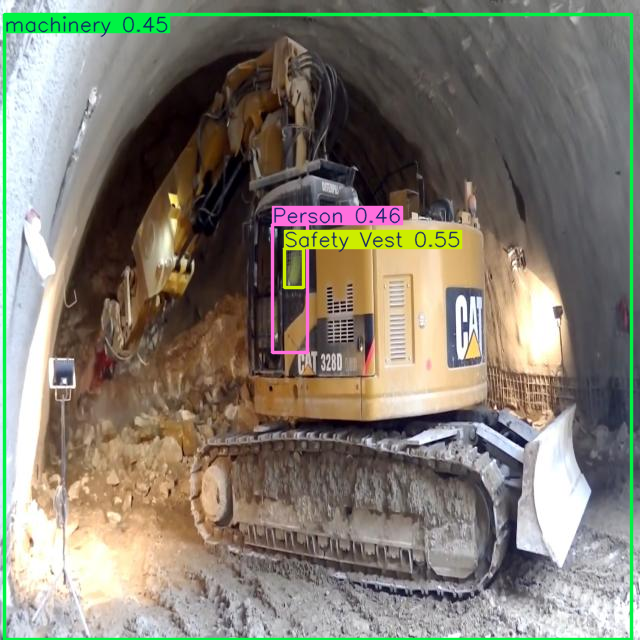

In [ ]:
# ---------------------------------------------------------------------------
# Bagian 2: Ekspor Artefak Training (dijalankan setelah training selesai)
# ---------------------------------------------------------------------------
current_base_dataset_path = None
if latest_run_dir_path and os.path.exists(latest_run_dir_path):
    print("\n--- Memulai Proses Ekspor Artefak ---")

    # Tentukan base_dataset_path sekali lagi untuk memastikan konsistensi
    current_base_dataset_path = dataset.location
    if not os.path.exists(os.path.join(current_base_dataset_path, "data.yaml")):
        print(f"data.yaml tidak ditemukan di {current_base_dataset_path}. Mencoba path alternatif...")
        current_base_dataset_path_drive = f"/content/drive/MyDrive/{project_name}-{str(project_version)}"
        if os.path.exists(os.path.join(current_base_dataset_path_drive, "data.yaml")):
            current_base_dataset_path = current_base_dataset_path_drive
            print(f"Menggunakan base dataset path: {current_base_dataset_path}")

    # --- Ekspor Label ke labels.json ---
    export_base_path_labels = os.path.join(export_base_path, "Labels")
    os.makedirs(export_base_path_labels, exist_ok=True)
    labels_output_file = os.path.join(export_base_path_labels, "labels.json")
    label_dirs_to_scan = {
        "train": os.path.join(current_base_dataset_path, "train/labels"),
        "valid": os.path.join(current_base_dataset_path, "valid/labels"),
        "test": os.path.join(current_base_dataset_path, "test/labels")
    }
    all_labels_data = {}
    for split_name, dir_path in label_dirs_to_scan.items():
        if os.path.isdir(dir_path):
            split_labels_list = []
            for label_file_name in os.listdir(dir_path):
                if label_file_name.endswith(".txt"):
                    try:
                        with open(os.path.join(dir_path, label_file_name), 'r') as f_label:
                            content = f_label.read()
                        split_labels_list.append({
                            "file_name": label_file_name,
                            "path_in_dataset": os.path.join(split_name, "labels", label_file_name),
                            "content": content
                        })
                    except Exception as e:
                        print(f"Gagal membaca file label {label_file_name}: {e}")
            all_labels_data[split_name] = split_labels_list
        else:
            all_labels_data[split_name] = []
    try:
        with open(labels_output_file, 'w') as f_json_labels:
            json.dump(all_labels_data, f_json_labels, indent=4)
        print(f"Semua label berhasil diekspor ke: {labels_output_file}")
    except Exception as e:
        print(f"Gagal menulis labels.json: {e}")

    # --- Ekspor Metadata, Model, dan Hasil Training ---
    export_base_path_metadata = os.path.join(export_base_path, "Metadata")
    export_weights_base_path = os.path.join(export_base_path, "Models")
    os.makedirs(export_base_path_metadata, exist_ok=True)
    os.makedirs(export_weights_base_path, exist_ok=True)

    metadata_output_file = os.path.join(export_base_path_metadata, "metadata.yaml")
    metadata_content = {
        "dataset_config_source_file": "data.yaml", "dataset_config_content": None,
        "training_output_archive": {"file_name": "training_results.zip", "original_path": latest_run_dir_path},
        "training_parameters": None, "exported_models": {"best_model_path_in_export": None, "last_model_path_in_export": None},
        "labels_file_path_in_export": "Labels/labels.json"
    }

    data_yaml_source_path = os.path.join(current_base_dataset_path, "data.yaml")
    if os.path.exists(data_yaml_source_path):
        shutil.copy(data_yaml_source_path, os.path.join(export_base_path_metadata, "data.yaml"))
        with open(data_yaml_source_path, 'r') as f_yaml_content:
            metadata_content["dataset_config_content"] = yaml.safe_load(f_yaml_content)

    try:
        shutil.make_archive(os.path.join(export_base_path_metadata, "training_results"), 'zip', latest_run_dir_path)
        args_yaml_path = os.path.join(latest_run_dir_path, "args.yaml")
        if os.path.exists(args_yaml_path):
            with open(args_yaml_path, 'r') as f_args_yaml:
                metadata_content["training_parameters"] = yaml.safe_load(f_args_yaml)
    except Exception as e:
        print(f"Gagal mengarsipkan hasil pelatihan: {e}")

    best_weights_source_path = os.path.join(latest_run_dir_path, "weights/best.pt")
    last_weights_source_path = os.path.join(latest_run_dir_path, "weights/last.pt")
    if os.path.exists(best_weights_source_path):
        shutil.copy(best_weights_source_path, os.path.join(export_weights_base_path, "best.pt"))
        metadata_content["exported_models"]["best_model_path_in_export"] = "Models/best.pt"
    if os.path.exists(last_weights_source_path):
        shutil.copy(last_weights_source_path, os.path.join(export_weights_base_path, "last.pt"))
        metadata_content["exported_models"]["last_model_path_in_export"] = "Models/last.pt"

    with open(metadata_output_file, 'w') as f_yaml_meta:
        yaml.dump(metadata_content, f_yaml_meta, indent=4, sort_keys=False)
    print(f"Semua artefak (metadata, model) berhasil diekspor ke: {export_base_path}")
    print("\n--- Proses Ekspor Selesai ---")
else:
    print("\nEkspor tidak dijalankan karena proses training tidak berhasil atau direktori hasil tidak ditemukan.")

# ---------------------------------------------------------------------------
# Bagian 3: Prediksi pada Gambar Test Acak (dijalankan setelah ekspor selesai)
# ---------------------------------------------------------------------------
if latest_run_dir_path and current_base_dataset_path:
    print("\n--- Memulai Prediksi pada Gambar Acak ---")

    # 1. Tentukan path model terbaik dan folder gambar test
    best_model_path = os.path.join(export_base_path, "Models/best.pt")
    test_images_folder = os.path.join(current_base_dataset_path, "test/images")

    # 2. Periksa apakah model dan folder test ada
    if os.path.exists(best_model_path) and os.path.isdir(test_images_folder):
        # Muat model terbaik yang telah dilatih
        model_trained = YOLO(best_model_path)
        print(f"Model terbaik berhasil dimuat dari: {best_model_path}")

        # Dapatkan daftar semua gambar di folder test
        try:
            image_files = [f for f in os.listdir(test_images_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if not image_files:
                print("Tidak ada file gambar yang ditemukan di folder test.")
            else:
                # 3. Pilih satu gambar secara acak
                random_image_name = random.choice(image_files)
                random_image_path = os.path.join(test_images_folder, random_image_name)
                print(f"Memilih gambar acak untuk prediksi: {random_image_name}")

                # 4. Lakukan prediksi
                prediction_results = model_trained.predict(
                    source=random_image_path,
                    conf=0.25
                )

                # 5. Tampilkan hasil prediksi
                if prediction_results:
                    prediction_results[0].show()
                else:
                    print("Prediksi tidak menghasilkan output.")
        except Exception as e:
            print(f"Terjadi kesalahan saat memproses gambar test: {e}")
    else:
        if not os.path.exists(best_model_path):
            print(f"Error: Model terbaik tidak ditemukan di {best_model_path}.")
        if not os.path.isdir(test_images_folder):
            print(f"Error: Folder gambar test tidak ditemukan di {test_images_folder}.")
else:
    print("\nPrediksi dilewati karena training atau ekspor tidak berhasil.")